In [1]:
from typing import List

import numpy as np
from matplotlib import pyplot as plt

from src.models.geometric_figure import GeometricFigure
from src.services.geometric_figure import (get_geometric_figures,
                                           plot_geometric_figures,
                                           preprocess_input)

In [2]:
IMAGE_SIZE = (256, 256)
DATA_VERSION = '2023-04-02'

In [3]:
geometric_figures: List[GeometricFigure] = get_geometric_figures(f'data/{DATA_VERSION}', IMAGE_SIZE)
print(f'Loaded {len(geometric_figures)} geometric figures')

Loaded 448 geometric figures


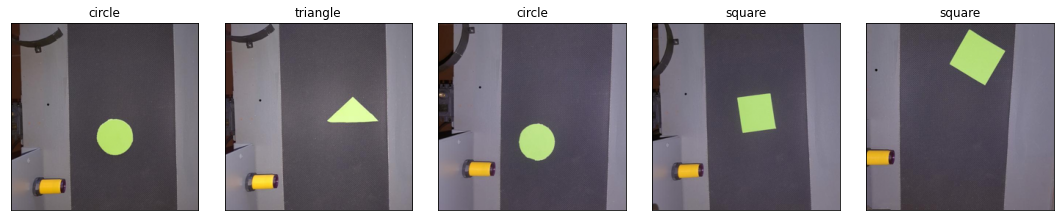

In [4]:
number_of_plots = 5
random_geometric_figures = [geometric_figures[i] for i in np.random.randint(0, len(geometric_figures), number_of_plots)]
plot_geometric_figures(random_geometric_figures, number_of_plots)
plt.show()

In [5]:
def get_random_image():
    return geometric_figures[np.random.randint(0, len(geometric_figures))]['image']


def get_random_images(n: int):
    geometric_figures_choice = np.random.choice(geometric_figures, n)
    return [geometric_figure['image'] for geometric_figure in geometric_figures_choice]

Verificação dos canais de cor da imagem para identificar o canal de maior importância

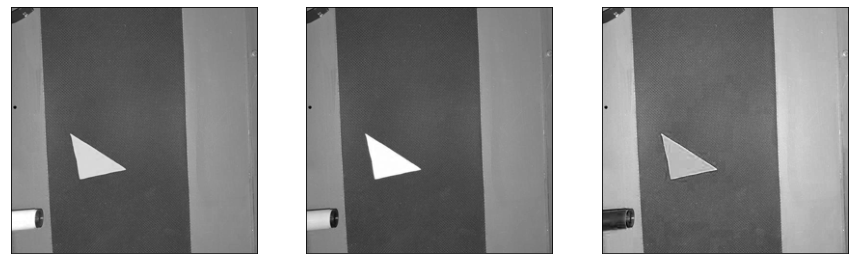

In [6]:
random_image = get_random_image()
def plot_separate_color_channels_image(image: np.ndarray) -> None:
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    for i in range(3):
        axs[i].imshow(image[:, :, i], cmap='gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    fig.patch.set_facecolor('white')

plot_separate_color_channels_image(random_image)
plt.show()

Pré processamento

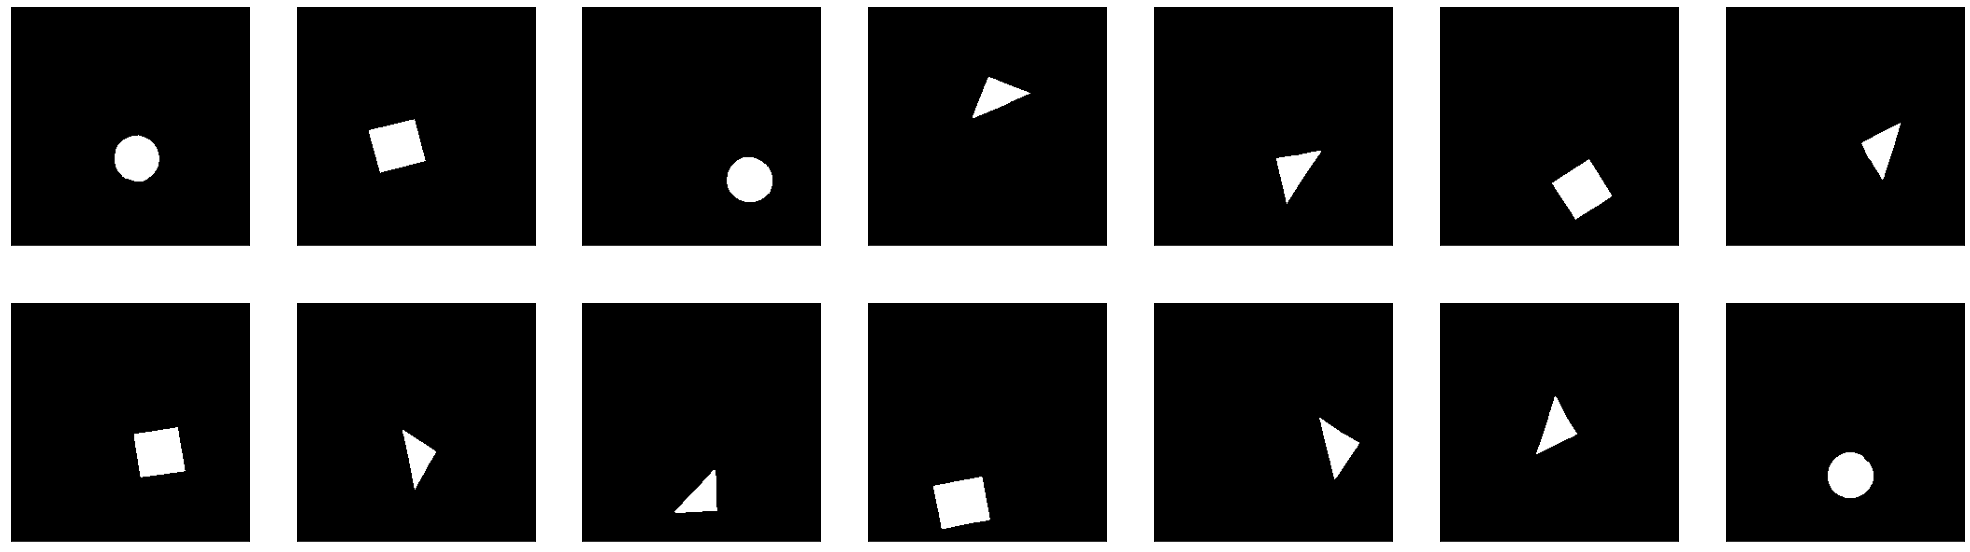

In [7]:
rows = 2
columns = 7
size = 5
random_images = get_random_images(rows * columns)
fig, axs = plt.subplots(rows, columns, figsize=(size * columns, size * rows))
axs = axs.flatten()
for i, random_image in enumerate(random_images):
    x = preprocess_input(random_image)
    axs[i].imshow(x, cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
fig.patch.set_facecolor('white')
plt.show()

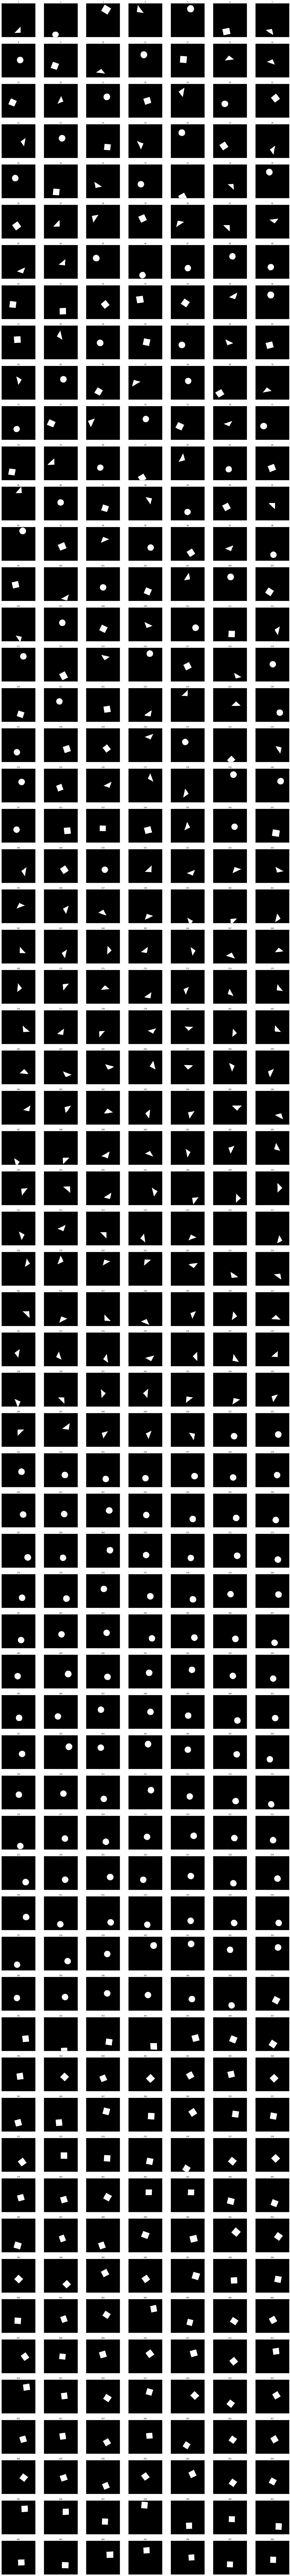

In [8]:
number_of_plots = len(geometric_figures)
rows = np.ceil(number_of_plots / columns).astype(int)
fig, axs = plt.subplots(rows, columns, figsize=(size * columns, size * rows))
axs = axs.flatten()
for i, gf in enumerate(geometric_figures):
    axs[i].set_title(i + 1)
    x = preprocess_input(gf['image'])
    axs[i].imshow(x, cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
fig.patch.set_facecolor('white')
plt.show()